In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from pylab import plot,show, hist, rcParams 
rcParams['figure.figsize'] = 12, 5

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

In [2]:
data = pd.read_csv( 'adult.csv' )
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# Описательная статистика для числовых полей
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
corr = data.corr()
corr

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


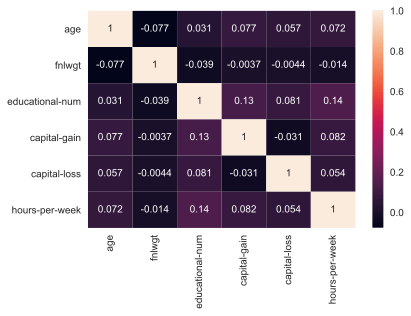

In [7]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026002F7ADA0>,
      dtype=object)

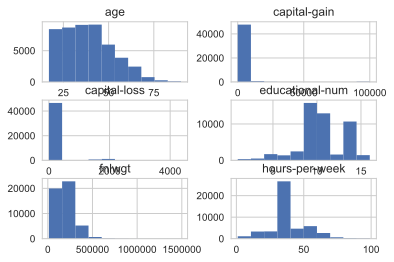

In [8]:
data.hist()

In [9]:
# Работа с категориальными значениями. Частота для категориальных полей
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'gender', 'native-country', 'income']
for x in category_col:
    print (x, data[x].value_counts())

workclass Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
race White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64
education HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
marital-status Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                  

In [10]:
#Данные с пропущенными значениями, % пропусков в данных
List_For_Clean=[]
for x in data.columns:
    if '?' in data[x].unique():
        List_For_Clean.append(x)
        
        print(x, str(data[x].value_counts()[data[x].value_counts().index=='?'][0]/len(data[x])*100),'%')

workclass 5.7307235575938735 %
occupation 5.751197739650301 %
native-country 1.7546374022357807 %


C:\Users\ibelaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [11]:
#Замена пропусков на наиболее часто встречающеейся значение
for t in List_For_Clean:
    data[t][data[t]=='?']=data['workclass'].value_counts().index[0]

C:\Users\ibelaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
#Распределение таргета
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [13]:
data['income']=data['income'].apply(lambda x: 0 if x=='<=50K' else 1  )

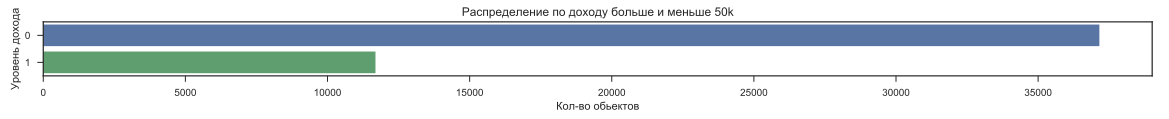

In [14]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=data)
plt.title('Распределение по доходу больше и меньше 50k')
plt.xlabel('Кол-во обьектов')
plt.ylabel('Уровень дохода')
plt.show()

C:\Users\ibelaya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ibelaya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


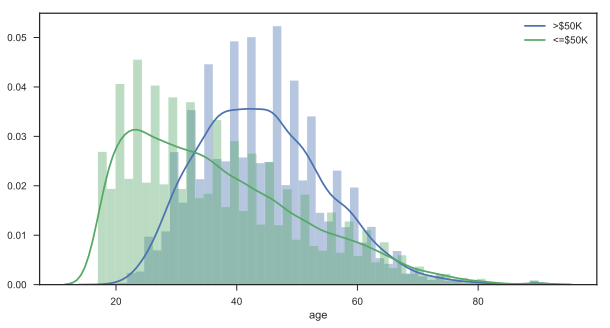

In [15]:
# Построим различные распределения в зависимости от признаков
# 1. Распределение дохода в зависимости от возраста
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(10,5)) 
sns.distplot(data[data['income'] == 1]['age'], kde_kws={"label": ">$50K"})
sns.distplot(data[data['income'] == 0]['age'], kde_kws={"label": "<=$50K"})

In [16]:
#Молодые специалисты как правило, зарабатывают до 50к

Text(0,0.5,'Кол-во обьектов, %')

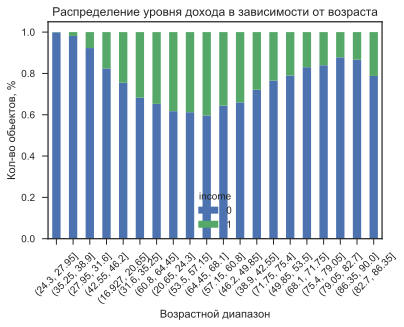

In [17]:
# Распределение дохода в зависимости от временного диапазона
data['age_bin'] = pd.cut(data['age'], 20)
table=pd.crosstab(data.age_bin,data.income)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, rot=45)
plt.title('Распределение уровня дохода в зависимости от возраста')
plt.xlabel('Возрастной диапазон')
plt.ylabel('Кол-во обьектов, %')

In [18]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.275178
0,0,36.872184


Text(0,0.5,'Кол-во обьектов, %')

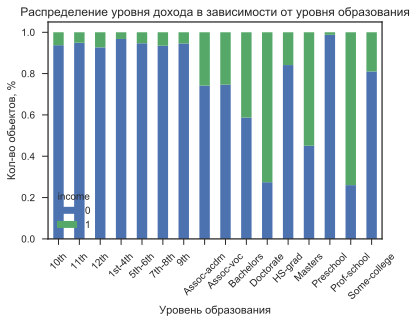

In [19]:
# 2. Распределение от уровня образования
table=pd.crosstab(data.education,data.income)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, rot=45)
plt.title('Распределение уровня дохода в зависимости от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Кол-во обьектов, %')

In [20]:
# Среди тех, кто оканчивал Bachelors или Preschool преобладают те, кто имеют высокий заработок

Text(0,0.5,'Кол-во обьектов, %')

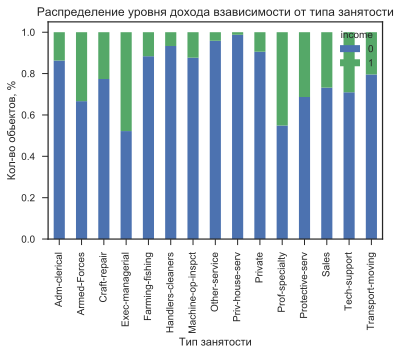

In [21]:
# 3. Распределение от сферы  занятости
table=pd.crosstab(data.occupation,data.income)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Распределение уровня дохода взависимости от типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Кол-во обьектов, %')

In [22]:
# Лучшие заработки у Exec-managerial и Prof-speciality

Text(0,0.5,'Кол-во обьектов, %')

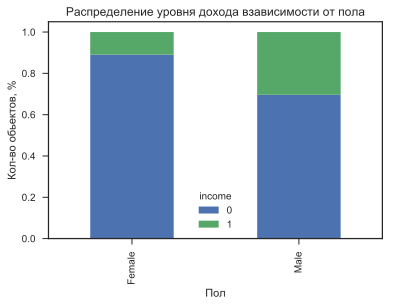

In [23]:
# 5. Кто зарабатывает больше? Мужчины или женщины?
table=pd.crosstab(data.gender,data.income)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Распределение уровня дохода взависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Кол-во обьектов, %')

In [24]:
# Все-таки, мужчины!

Text(0,0.5,'Кол-во обьектов, %')

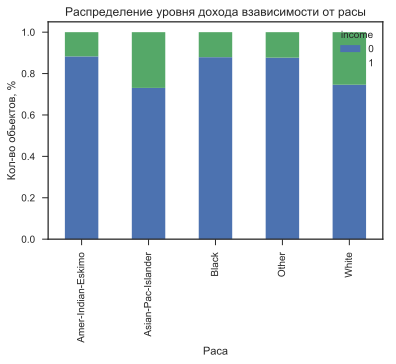

In [25]:
# 7. Распределение в зависимости от расы
table=pd.crosstab(data.race,data.income)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Распределение уровня дохода взависимости от расы')
plt.xlabel('Раса')
plt.ylabel('Кол-во обьектов, %')

In [26]:
selected_columns = data[ ['age', 'hours-per-week', 'workclass', 'education', 'occupation', 'marital-status', 'gender'] ]                                                                 

In [27]:
X = pd.get_dummies(selected_columns, columns = ['workclass', 'education', 'occupation', 'marital-status', 'gender'])
X.head()

,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,occupation_Transport-moving,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,gender_Female,gender_Male
0,25,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,38,50,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,28,40,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,44,40,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,18,30,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [28]:
target = data['income']

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()

In [30]:
le.fit(target)

LabelEncoder()

In [31]:
y = pd.Series(le.transform(data['income']))

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3)

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=i)
    logreg.fit(X_train, Y_train)
    
    print('Номер эксперемента (итерации разбиения выборки): {:.0f}'.format(i))
    print('Результата на трейне : {:.4f}'.format(logreg.score(X_train, Y_train)))  
    print('Результата на тесте : {:.4f}'.format(logreg.score(X_test, Y_test)))

Номер эксперемента (итерации разбиения выборки): 0
Результата на трейне : 0.8356
Результата на тесте : 0.8333
Номер эксперемента (итерации разбиения выборки): 1
Результата на трейне : 0.8342
Результата на тесте : 0.8349
Номер эксперемента (итерации разбиения выборки): 2
Результата на трейне : 0.8339
Результата на тесте : 0.8343
Номер эксперемента (итерации разбиения выборки): 3
Результата на трейне : 0.8334
Результата на тесте : 0.8364
Номер эксперемента (итерации разбиения выборки): 4
Результата на трейне : 0.8349
Результата на тесте : 0.8344
Номер эксперемента (итерации разбиения выборки): 5
Результата на трейне : 0.8356
Результата на тесте : 0.8315
Номер эксперемента (итерации разбиения выборки): 6
Результата на трейне : 0.8352
Результата на тесте : 0.8319
Номер эксперемента (итерации разбиения выборки): 7
Результата на трейне : 0.8345
Результата на тесте : 0.8337
Номер эксперемента (итерации разбиения выборки): 8
Результата на трейне : 0.8338
Результата на тесте : 0.8355
Номер эксп